In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
os.chdir("/Users/anon/GitHubRepos/Kaggle/TravellingSanta/Data")

In [21]:
city_data = pd.read_csv("cities.csv")

In [22]:
city_data.head(5)

,CityId,X,Y
0,0,316.836739,2202.340707
1,1,4377.405972,336.602082
2,2,3454.158198,2820.053011
3,3,4688.099298,2935.898056
4,4,1010.696952,3236.750989


In [23]:
city_data.columns = ['CityId','x_coord','y_coord']

In [24]:
city_data.shape

(197769, 3)

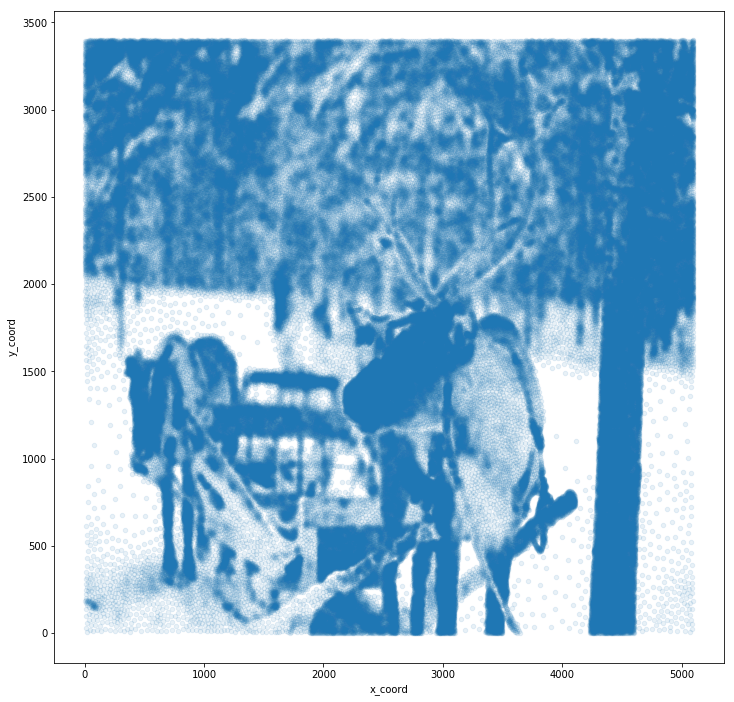

In [25]:
## creating a scatter plot of the x y coordinates of all the cities
city_data.plot(kind="scatter",x = "x_coord", y = "y_coord", alpha=0.1, figsize = (12,12))

plt.show()

In [26]:
## finding the distance between two locations
# the euclidean distance can be calculated based on the formula

def distance_calculation(i,j):
    dist = np.sqrt((city_data.loc[city_data['CityId']==i,'x_coord'].values[0] - city_data.loc[city_data['CityId']==j,'x_coord'].values[0])**2+(city_data.loc[city_data['CityId']==i,'y_coord'].values[0] - city_data.loc[city_data['CityId']==j,'y_coord'].values[0])**2)
    return dist

In [181]:
distance = distance_calculation(77462,124109)
#city_data.iloc[2,1]
print(distance)

587.9980451444526


In [82]:
##checking if a city id is a prime id
def prime_check(x):
    divisor_array = np.arange(2,(x/2)+1)
    remainder_array = x%divisor_array
    if 0 in remainder_array:
        ## indicates non prime
        return 0
    else:
        ##indicates prime
        return 1

            

In [83]:
## Adding a column to data to indicate if city id is prime or not

city_data['prime_or_not'] = city_data['CityId'].apply(lambda x: pd.Series(prime_check(x)))


In [81]:
city_data.head(10)

,CityId,x_coord,y_coord,prime_or_not
0,0,316.836739,2202.340707,1
1,1,4377.405972,336.602082,1
2,2,3454.158198,2820.053011,1
3,3,4688.099298,2935.898056,1
4,4,1010.696952,3236.750989,0
5,5,2474.230877,1435.514651,1
6,6,1029.277795,2721.800952,0
7,7,3408.887685,199.585793,1
8,8,1304.006125,2657.427246,0
9,9,4211.525725,2294.595208,0


## Creating a subset of the city data

In [22]:
import random
city_data.shape
subset_index = random.sample(range(city_data.shape[0]), 1000)

In [31]:
## creating the sample city dataframe from the randomly generated indices in the previous step
city_data_sample = city_data.iloc[subset_index,:]
#type(subset_index)

In [38]:
## Adding the city ID 0 as that is required from the start point
city_data_sample = city_data_sample.append(city_data.iloc[0,:])

In [39]:
city_data_sample.shape

(1001, 3)

In [40]:
## Just checking if the city Id 0 was already part of the randomly generated index
city_data_sample.loc[city_data_sample['CityId']==0]

,CityId,x_coord,y_coord
0,0.0,316.836739,2202.340707


In [45]:
print(max(city_data_sample['y_coord']), min(city_data_sample['y_coord']))

3395.49368729347 1.6348305207666298


In [46]:
print(max(city_data_sample['x_coord']), min(city_data_sample['x_coord']))

5097.24317435933 38.0819264150771


In [27]:
center_x_coord = (max(city_data['x_coord'])- min(city_data['x_coord']))/2

In [28]:
center_y_coord = (max(city_data['y_coord'])- min(city_data['y_coord']))/2

In [43]:
print(center_x_coord, center_y_coord)

2529.5806239721264 1696.9294283863517


## Creating imaginary square shaped clusters over the entire space

In [29]:
## Size of each square assuming we will have a total of 25 squares (5 rows and 5 columns)
square_x_dim = (max(city_data['x_coord']) - min(city_data['x_coord']))/5
square_y_dim = (max(city_data['y_coord']) - min(city_data['y_coord']))/5

In [48]:
print(square_x_dim, square_y_dim)

1011.8322495888506 678.7717713545406


In [51]:
city_data_sample.loc[city_data_sample['x_coord']==38.0819264150771]
city_data_sample.loc[city_data_sample['y_coord']==min(city_data_sample['y_coord'])]

,CityId,x_coord,y_coord
68653,68653.0,2745.936238,1.634831


In [30]:
square_x_points = []
square_y_points = []
x_min = min(city_data['x_coord'])
y_min = min(city_data['y_coord'])
for i in range(0,6):
    square_x_points.append(x_min + (square_x_dim * i))
    square_y_points.append(y_min + (square_y_dim * i))


In [31]:
square_x_points

[1.87192466558405,
 1021.3979680937692,
 2040.9240115219543,
 3060.4500549501395,
 4079.976098378325,
 5099.50214180651]

In [32]:
square_y_points

[0.0,
 679.5619648253121,
 1359.1239296506242,
 2038.6858944759363,
 2718.2478593012484,
 3397.8098241265607]

### finding all the cities that lie within each squares

In [35]:
## np.digitize is to allocate the value to the appropriate bin
city_data['Cluster_x'] = np.digitize(city_data['x_coord'],square_x_points)

In [36]:
city_data['Cluster_y'] = np.digitize(city_data['y_coord'],square_y_points)

In [37]:
#city_data['Square_number'] = (city_data['Cluster_y']-1)*5 + city_data['Cluster_x']

In [38]:
def Squarenumber_calculation(x,y):
    if y%2==0:
        square_number = (y*5 - x) + 1
    elif y%2 != 0:
        square_number = (y-1)*5 + x
    return square_number
        

In [39]:
## if cluster_y is even then reverse 
city_data['Square_number'] = city_data.apply(lambda x : Squarenumber_calculation(x['Cluster_x'],x['Cluster_y']), axis=1)

#### finding the sequence of movement for each square - it is from the starting point to the diagonally opposite point , from that point to the next square's diagonally opposite point and so on
find the euclidean distance of all points within a square and rank them in ascending order ending at the diagonal opposite point

In [185]:
## Looping from 1 to 5; have a counter; check if the counter is a divisibel of 5 or 10. If 5, double the cluster 
## number and then start reversing the count, If divisbible by 10, double the cluster number and start increasing the
## count

## after each cluster is completed - how to transistion to the next; Just find the nearest point and make that point
## as the starting point of that cluster


In [40]:
move_sequence = []
for i in range(1,26):
    square_clusters = city_data.loc[city_data['Square_number']==i,['CityId','x_coord','y_coord']]
    square_clusters['total'] = square_clusters['x_coord'] + square_clusters['y_coord']
    if i==1:
        start_point = square_clusters.loc[square_clusters['total'].idxmin(),'CityId']
    else:
        square_clusters['start_point'] = square_clusters.apply(lambda x: distance_calculation(end_point, x['CityId']), axis = 1)
        start_point = square_clusters.loc[square_clusters['start_point'].idxmin(),['CityId']].values[0]
    square_clusters['distance'] = square_clusters.apply(lambda x : distance_calculation(start_point, x['CityId']), axis=1)
    square_clusters['rank'] = square_clusters['distance'].rank()
    end_point = square_clusters.loc[square_clusters['rank'].idxmax(),['CityId']].values[0]
    for j in range(1,square_clusters.shape[0]+1):
        move_sequence.append(square_clusters.loc[square_clusters['rank']==j,'CityId'].values[0])
 


        
        

In [54]:
city_data.loc[city_data['Square_number']==26]  

,CityId,x_coord,y_coord,Cluster_x,Cluster_y,Square_number
107314,107314,5099.502142,2962.965757,6,5,26.0


In [43]:
final_city_list = pd.DataFrame({'CityId':move_sequence})

In [52]:
len(move_sequence)

197768

In [51]:
final_city_list.shape

(197768, 1)

In [45]:
final_city_list.loc[final_city_list['CityId']==0]

,CityId
143220,0


In [50]:
final_city_list.to_csv("final_city_list.csv")

## The below code is to draw ellipse. Not to be used now

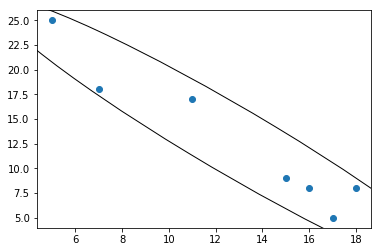

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

x = [5,7,11,15,16,17,18]
y = [25, 18, 17, 9, 8, 5, 8]

nstd = 2
ax = plt.subplot(111)

cov = np.cov(x, y)
vals, vecs = eigsorted(cov)
theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
w, h = 2 * nstd * np.sqrt(vals)
ell = Ellipse(xy=(np.mean(x), np.mean(y)),
              width=w, height=h,
              angle=theta, color='black')
ell.set_facecolor('none')
ax.add_artist(ell)
plt.scatter(x, y)
plt.show()